# Netflix sub fees analysis
### This notebook is created to analyze the data regarding the monthly sub fees of netflix in all countries
### The datasource is ( https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries/version/2?select=netflix+price+in+different+countries.csv# )

In [21]:
#importing libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas

#### 1) understanding data


In [22]:
#reading the netflix sub
nfx_price_per_cou_df=pd.read_csv("netflix price in different countries.csv")

#reading the netflix sub fee of dec
nfx_fee_dec=pd.read_csv("Netflix subscription fee Dec-2021.csv")

In [23]:
#Analyzing price of netflix in diffrent countries
nfx_price_per_cou_df.columns

Index(['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies',
       'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Premium ($)'],
      dtype='object')

In [24]:
nfx_price_per_cou_df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [25]:
#it is neccessery to change the columns name. They are not accessible in dottedMethod

nfx_price_per_cou_df=nfx_price_per_cou_df.rename(columns={'Total Library Size': 'Tot_shows',
                                                            'No. of TV Shows': 'Tot_TVShows',
                                                            'No. of Movies': 'Tot_Movies',
                                                            'Cost Per Month - Basic ($)': 'Basic_monthly_cost',
                                                            'Cost Per Month - Standard ($)': 'Std_monthly_cost',
                                                            'Cost Per Month - Premium ($)':'Prem_monthly_cost'})

nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


#### Now the data is saved in a more accessible way

In [26]:
#infos on the rows and adata value
nfx_price_per_cou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             65 non-null     object 
 1   Tot_shows           65 non-null     int64  
 2   Tot_TVShows         65 non-null     int64  
 3   Tot_Movies          65 non-null     int64  
 4   Basic_monthly_cost  65 non-null     float64
 5   Std_monthly_cost    65 non-null     float64
 6   Prem_monthly_cost   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


#### First interesting question is what country have the avg cost for a netflix subs



In [27]:
nfx_price_per_cou_df['Avg_cost']=nfx_price_per_cou_df[['Std_monthly_cost','Prem_monthly_cost','Basic_monthly_cost']].mean(axis=1)
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667
...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000
62,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667


In [28]:
#MostExpesive

most_avg_exp=nfx_price_per_cou_df.sort_values('Avg_cost',ascending=False).head(10)
most_avg_exp

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667
45,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000
11,France,5445,3604,1841,10.16,15.24,20.32,15.240000
20,Israel,5713,3650,2063,10.56,15.05,19.54,15.050000
53,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333
18,Iceland,6387,4426,1961,9.03,14.67,20.32,14.673333
21,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333
35,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333


In [29]:
#leastExpensive
least_exp=nfx_price_per_cou_df.sort_values('Avg_cost',ascending=True).head(10)
least_exp

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
41,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667
19,India,5843,3718,2125,2.64,6.61,8.60,5.950000
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
5,Colombia,4991,3156,1835,4.31,6.86,9.93,7.033333
59,Brazil,4972,3162,1810,4.61,7.11,9.96,7.226667
42,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333
30,Peru,4986,3155,1831,6.11,8.56,11.01,8.560000
31,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000
37,South Africa,5736,3686,2050,6.26,10.05,12.58,9.630000
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667


c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Least avg netflix cost')

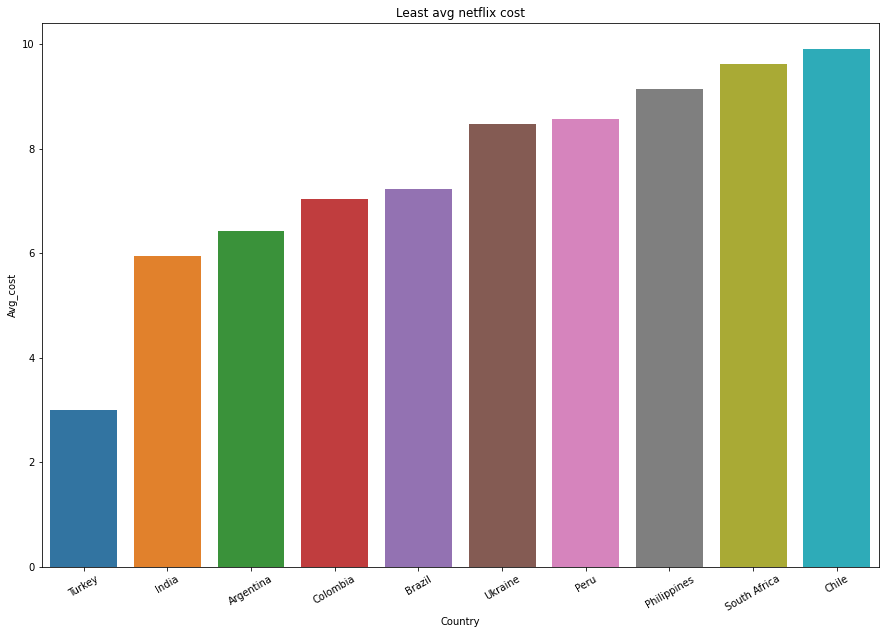

In [30]:
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Avg_cost', data=least_exp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Least avg netflix cost')



c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most avg netflix cost')

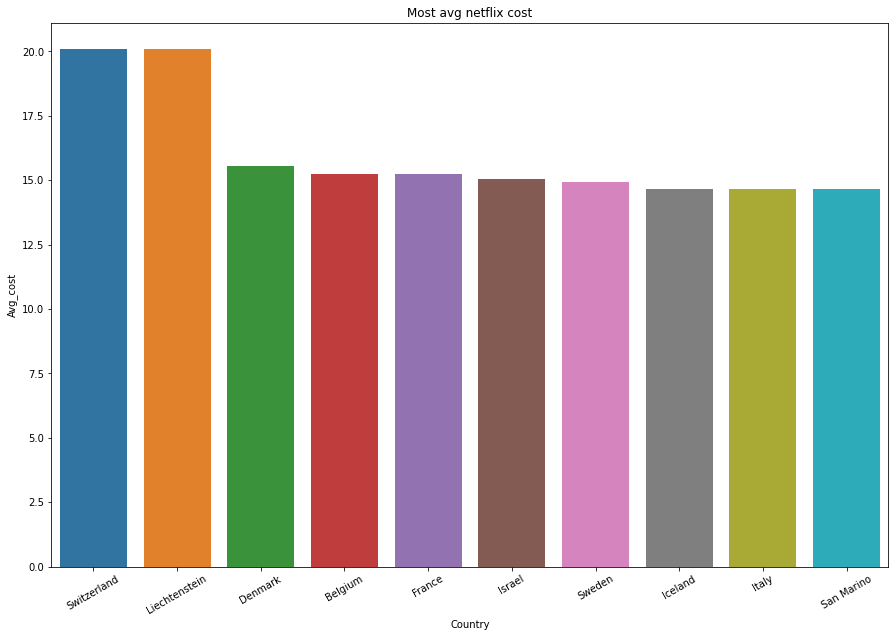

In [31]:
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Avg_cost', data=most_avg_exp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Most avg netflix cost')

In [32]:
#avg cost per title (relationship between titles and cost)
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667
...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000
62,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667


In [33]:
nfx_price_per_cou_df["Avg_cost_basic_per_title"]=nfx_price_per_cou_df.Basic_monthly_cost/nfx_price_per_cou_df.Tot_shows
nfx_price_per_cou_df["Avg_cost_Std_per_title"]=nfx_price_per_cou_df.Std_monthly_cost/nfx_price_per_cou_df.Tot_shows
nfx_price_per_cou_df["Avg_cost_premium_per_title"]=nfx_price_per_cou_df.Prem_monthly_cost/nfx_price_per_cou_df.Tot_shows
nfx_price_per_cou_df["Avg_cost_per_title"]=nfx_price_per_cou_df.Avg_cost/nfx_price_per_cou_df.Tot_shows

nfx_price_per_cou_df


,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651
62,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411


In [34]:
#seeing of the previws infos regarding the avg cost are in line with the cost per title
least_exp_per_title=nfx_price_per_cou_df.sort_values('Avg_cost_per_title').head(10)
least_exp_per_title

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title
41,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667,0.000425,0.000647,0.000867,0.000646
19,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352
5,Colombia,4991,3156,1835,4.31,6.86,9.93,7.033333,0.000864,0.001374,0.001990,0.001409
31,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437
59,Brazil,4972,3162,1810,4.61,7.11,9.96,7.226667,0.000927,0.001430,0.002003,0.001453
50,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556
8,Czechia,7325,5234,2091,8.83,11.49,14.15,11.490000,0.001205,0.001569,0.001932,0.001569
42,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586
36,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604


c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Least_cost_per_title')

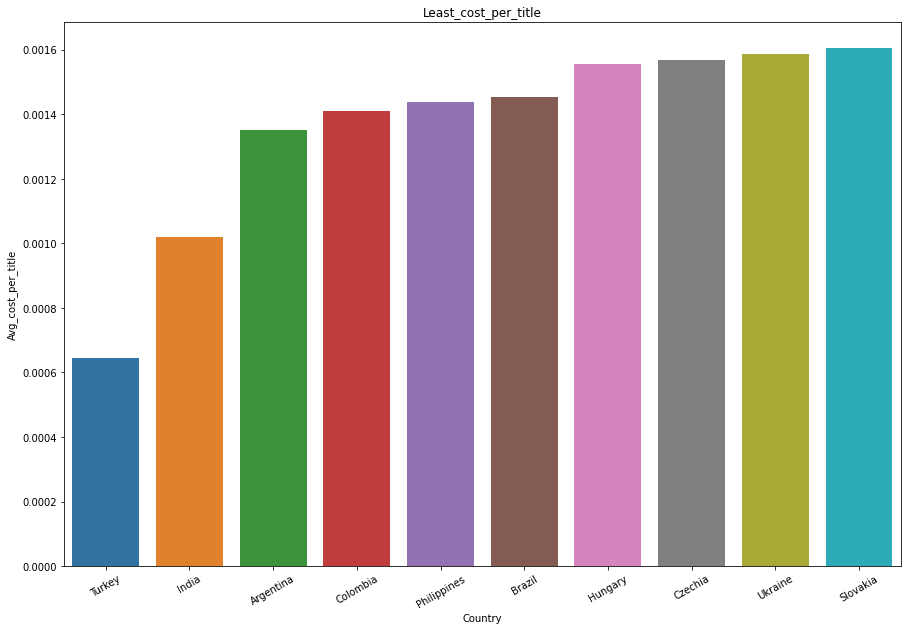

In [35]:
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Avg_cost_per_title', data=least_exp_per_title)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Least_cost_per_title')

In [36]:
#from the least_exp titles we get only the countries that have a number of total shows greather then the avg of total shows
total_avg_SHOWS=nfx_price_per_cou_df.Tot_shows.mean()
total_avg_SHOWS

5314.415384615385

In [37]:
low_price_high_title=least_exp_per_title[least_exp_per_title.Tot_shows>total_avg_SHOWS]
low_price_high_title

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title
19,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018
31,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437
50,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556
8,Czechia,7325,5234,2091,8.83,11.49,14.15,11.490000,0.001205,0.001569,0.001932,0.001569
42,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586
36,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604


In [38]:
low_price_high_title2= least_exp_per_title.merge(least_exp, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
low_price_high_title2

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,_merge
6,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556,left_only
7,Czechia,7325,5234,2091,8.83,11.49,14.15,11.490000,0.001205,0.001569,0.001932,0.001569,left_only
9,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,left_only


In [39]:
high_price_low_titles=most_avg_exp[most_avg_exp.Tot_shows<total_avg_SHOWS]
high_price_low_titles

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost
23,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000
63,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667
45,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000
53,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333
21,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333
35,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333


##### We have found that in some countries it netflix price is convinent relative to the number of titles they offer, in some other countries
##### netflix is not convinent at all (san marino and liechtenstein)
##### This analyis does not take in consideration economics aspects of these countries

### Integrating and considering economic aspects of the previws analysis by retriving data related to countries gdp

In [40]:
from urllib.request import urlretrieve

urlretrieve('https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv', 
            'countries.csv')

('countries.csv', <http.client.HTTPMessage at 0x1ea4399c610>)

In [41]:
countries_df = pd.read_csv('countries.csv')
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [42]:
countries_gdp=countries_df[['location','gdp_per_capita']]
countries_gdp

,location,gdp_per_capita
0,Afghanistan,1803.987
1,Albania,11803.431
2,Algeria,13913.839
3,Andorra,NaN
4,Angola,5819.495
...,...,...
205,Vietnam,6171.884
206,Western Sahara,NaN
207,Yemen,1479.147
208,Zambia,3689.251


In [43]:

countries_df.loc[countries_df['location'] == 'Liechtenstein', ['gdp_per_capita']] = 165028
countries_df[countries_df.location=='Liechtenstein']



,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
113,Liechtenstein,Europe,38137.0,82.49,2.397,165028.0


In [44]:
#merging the countries gdp dataframe with the netflix analysis
countries_gdp=countries_gdp.rename(columns={"location":"Country"})
nfx_price_per_cou_df=nfx_price_per_cou_df.merge(countries_gdp,on="Country")
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166
61,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710
62,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515


In [45]:
top_rich_countries=nfx_price_per_cou_df.sort_values('gdp_per_capita',ascending=False).head(20)
top_rich_countries

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita
45,Singapore,6303,4109,2194,9.51,12.81,16.11,12.810000,0.001509,0.002032,0.002556,0.002032,85535.383
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293
27,Norway,4528,2955,1573,9.94,12.17,17.75,13.286667,0.002195,0.002688,0.003920,0.002934,64800.057
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166
34,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333,0.003909,0.006351,0.008797,0.006352,56861.470
16,Hong Kong,4746,2883,1863,8.08,10.00,11.93,10.003333,0.001702,0.002107,0.002514,0.002108,56054.920
63,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446
51,Netherlands,5376,3779,1597,9.03,13.54,18.06,13.543333,0.001680,0.002519,0.003359,0.002519,48472.545
52,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333,0.002499,0.003256,0.004517,0.003424,46949.283
62,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515


In [46]:
#least convienet palces to have netflix
least_convinent= high_price_low_titles.merge(top_rich_countries, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
least_convinent=least_convinent.merge(nfx_price_per_cou_df, on='Country')
least_convinent



,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies_y,Basic_monthly_cost_y,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita_y
0,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000,NaN,NaN,...,1336,12.88,20.46,26.96,20.100000,0.004226,0.006713,0.008845,0.006594,NaN
1,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,NaN,NaN,...,1638,9.03,14.67,20.32,14.673333,0.001742,0.002830,0.003921,0.002831,35220.084


In [47]:
#no country is convient
most_convinent= low_price_high_title.merge(top_rich_countries, on="Country")
most_convinent=most_convinent.merge(nfx_price_per_cou_df, on='Country')
most_convinent



,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,Avg_cost_premium_per_title_x,...,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita_y


In [48]:
avg_gdp=nfx_price_per_cou_df.gdp_per_capita.mean()
low_price_high_title=low_price_high_title.merge(nfx_price_per_cou_df,on="Country")
low_price_high_title


,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies_y,Basic_monthly_cost_y,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita
0,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,...,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018,6426.674
1,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,...,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188
2,Hungary,6884,4802,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,...,2082,7.64,10.71,13.78,10.710000,0.001110,0.001556,0.002002,0.001556,26777.561
3,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,...,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393
4,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,...,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152


In [49]:
#No results here
most_convinent=low_price_high_title[low_price_high_title.gdp_per_capita>avg_gdp]
most_convinent

,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies_y,Basic_monthly_cost_y,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita
4,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,...,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152


In [50]:
most_convinent2=low_price_high_title[low_price_high_title.gdp_per_capita==low_price_high_title.gdp_per_capita.max()]

most_convinent2

,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies_y,Basic_monthly_cost_y,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita
4,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,...,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152


In [51]:

least_convinent

,Country,Tot_shows_x,Tot_TVShows_x,Tot_Movies_x,Basic_monthly_cost_x,Std_monthly_cost_x,Prem_monthly_cost_x,Avg_cost_x,Avg_cost_basic_per_title_x,Avg_cost_Std_per_title_x,...,Tot_Movies_y,Basic_monthly_cost_y,Std_monthly_cost_y,Prem_monthly_cost_y,Avg_cost_y,Avg_cost_basic_per_title_y,Avg_cost_Std_per_title_y,Avg_cost_premium_per_title_y,Avg_cost_per_title_y,gdp_per_capita_y
0,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,20.100000,NaN,NaN,...,1336,12.88,20.46,26.96,20.100000,0.004226,0.006713,0.008845,0.006594,NaN
1,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,NaN,NaN,...,1638,9.03,14.67,20.32,14.673333,0.001742,0.002830,0.003921,0.002831,35220.084


In [52]:
moast_and_least=nfx_price_per_cou_df[(nfx_price_per_cou_df.Country=="Italy") | (nfx_price_per_cou_df.Country=="Slovakia")]
moast_and_least

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita
20,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,0.001742,0.002830,0.003921,0.002831,35220.084
35,Slovakia,7035,5055,1980,9.03,11.29,13.54,11.286667,0.001284,0.001605,0.001925,0.001604,30155.152


In [53]:
#Netflix in december
#formatting data
nfx_fee_dec=nfx_fee_dec.rename(columns={'Total Library Size': 'Tot_shows_dic',
                                                            'No. of TV Shows': 'Tot_TVShows_dic',
                                                            'No. of Movies': 'Tot_Movies_dic',
                                                            'Cost Per Month - Basic ($)': 'Basic_monthly_cost_dic',
                                                            'Cost Per Month - Standard ($)': 'Std_monthly_cost_dic',
                                                            'Cost Per Month - Premium ($)':'Prem_monthly_cost_dic',
                                                            'Avg_cost': 'Avg_cost_dic'})
nfx_fee_dec


,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


In [54]:
nfx_fee_dec["Avg_cost_dic"]=nfx_fee_dec[['Basic_monthly_cost_dic','Std_monthly_cost_dic','Prem_monthly_cost_dic']].mean(axis=1)
nfx_fee_dec

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000
...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,13.196667
62,us,United States,5818,3826,1992,8.99,13.99,17.99,13.656667
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,12.656667


In [55]:
nfx_normal_vs_dic=pd.merge(nfx_fee_dec,nfx_price_per_cou_df, on=["Country"])
nfx_normal_vs_dic

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,4760,...,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,6114,...,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,5640,...,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000,4990,...,1616,10.16,15.24,20.32,15.240000,0.002036,0.003054,0.004072,0.003054,42658.576
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,4991,...,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,5336,...,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393
60,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,13.196667,6643,...,2092,7.91,13.20,18.48,13.196667,0.001191,0.001987,0.002782,0.001987,39753.244
61,us,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,5818,...,1992,8.99,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446
62,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,12.656667,4989,...,1835,8.99,12.99,15.99,12.656667,0.001802,0.002604,0.003205,0.002537,20551.409


In [56]:
# lets now get the countries where netflix has grown in cost
nfx_cost_grown=nfx_normal_vs_dic[nfx_normal_vs_dic.Avg_cost<nfx_normal_vs_dic.Avg_cost_dic]
nfx_cost_grown

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,6114,...,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93,7.033333,4991,...,1835,4.31,6.86,9.93,7.033333,0.000864,0.001374,0.001990,0.001409,13254.949


In [57]:
#lets see this diffrence 

nfx_normal_vs_dic["Avg_growth"]=nfx_normal_vs_dic["Avg_cost"]-nfx_normal_vs_dic['Avg_cost_dic']
nfx_normal_vs_dic

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,4760,...,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,0.000000e+00
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,6114,...,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,-1.776357e-15
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,5640,...,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,1.776357e-15
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000,4990,...,10.16,15.24,20.32,15.240000,0.002036,0.003054,0.004072,0.003054,42658.576,0.000000e+00
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,4991,...,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,5336,...,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,0.000000e+00
60,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,13.196667,6643,...,7.91,13.20,18.48,13.196667,0.001191,0.001987,0.002782,0.001987,39753.244,0.000000e+00
61,us,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,5818,...,8.99,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446,0.000000e+00
62,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,12.656667,4989,...,8.99,12.99,15.99,12.656667,0.001802,0.002604,0.003205,0.002537,20551.409,0.000000e+00


In [58]:
#growing, decreasing and steady countries
nfx_cost_grown=nfx_normal_vs_dic[nfx_normal_vs_dic["Avg_growth"]<0]

nfx_cost_equal=nfx_normal_vs_dic[nfx_normal_vs_dic["Avg_growth"]==0]
nfx_cost_dec=nfx_normal_vs_dic[nfx_normal_vs_dic["Avg_growth"]>0]

In [59]:
nfx_cost_grown

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,6114,...,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,-1.776357e-15
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93,7.033333,4991,...,4.31,6.86,9.93,7.033333,0.000864,0.001374,0.001990,0.001409,13254.949,-1.776357e-15


In [60]:
nfx_cost_dec

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,5640,...,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,1.776357e-15
17,de,Germany,5668,3814,1854,9.03,14.67,20.32,14.673333,5668,...,9.03,14.67,20.32,14.673333,0.001593,0.002588,0.003585,0.002589,45229.245,1.776357e-15
18,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,14.673333,6167,...,9.03,14.67,20.32,14.673333,0.001464,0.002379,0.003295,0.002379,NaN,1.776357e-15
24,is,Iceland,6387,4426,1961,9.03,14.67,20.32,14.673333,6387,...,9.03,14.67,20.32,14.673333,0.001414,0.002297,0.003181,0.002297,46482.958,1.776357e-15
27,ie,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,6486,...,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,1.776357e-15
28,il,Israel,5713,3650,2063,10.56,15.05,19.54,15.050000,5713,...,10.56,15.05,19.54,15.050000,0.001848,0.002634,0.003420,0.002634,33132.320,3.552714e-15
29,it,Italy,5183,3545,1638,9.03,14.67,20.32,14.673333,5183,...,9.03,14.67,20.32,14.673333,0.001742,0.002830,0.003921,0.002831,35220.084,1.776357e-15
34,my,Malaysia,5952,3565,2387,8.29,10.65,13.02,10.653333,5952,...,8.29,10.65,13.02,10.653333,0.001393,0.001789,0.002187,0.001790,26808.164,1.776357e-15
35,mx,Mexico,4993,3158,1835,6.62,10.43,14.24,10.430000,4993,...,6.62,10.43,14.24,10.430000,0.001326,0.002089,0.002852,0.002089,17336.469,1.776357e-15
48,sm,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333,2310,...,9.03,14.67,20.32,14.673333,0.003909,0.006351,0.008797,0.006352,56861.470,1.776357e-15


In [61]:
nfx_cost_equal

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,4760,...,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,0.0
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000,4990,...,10.16,15.24,20.32,15.240000,0.002036,0.003054,0.004072,0.003054,42658.576,0.0
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,4991,...,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,0.0
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96,7.226667,4972,...,4.61,7.11,9.96,7.226667,0.000927,0.001430,0.002003,0.001453,14103.452,0.0
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,6797,...,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307,0.0
7,ca,Canada,6239,4311,1928,7.91,11.87,15.03,11.603333,6239,...,7.91,11.87,15.03,11.603333,0.001268,0.001903,0.002409,0.001860,44017.591,0.0
8,cl,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,4994,...,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037,0.0
10,cr,Costa Rica,4988,3152,1836,8.99,12.99,15.99,12.656667,4988,...,8.99,12.99,15.99,12.656667,0.001802,0.002604,0.003206,0.002537,15524.995,0.0
11,hr,Croatia,2274,1675,599,9.03,11.29,13.54,11.286667,2274,...,9.03,11.29,13.54,11.286667,0.003971,0.004965,0.005954,0.004963,22669.797,0.0
12,dk,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,4558,...,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515,0.0


## No country has seen a increase of the cost


In [62]:
#Lets see which country has seen a increase of movies
nfx_normal_vs_dic["New_shows"]=nfx_normal_vs_dic["Tot_shows"]-nfx_normal_vs_dic["Tot_shows_dic"]
nfx_normal_vs_dic

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth,New_shows
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,4760,...,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,0.000000e+00,0
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,6114,...,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,-1.776357e-15,0
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,5640,...,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,1.776357e-15,0
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000,4990,...,15.24,20.32,15.240000,0.002036,0.003054,0.004072,0.003054,42658.576,0.000000e+00,0
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,4991,...,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,5336,...,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,0.000000e+00,0
60,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,13.196667,6643,...,13.20,18.48,13.196667,0.001191,0.001987,0.002782,0.001987,39753.244,0.000000e+00,0
61,us,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,5818,...,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446,0.000000e+00,0
62,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,12.656667,4989,...,12.99,15.99,12.656667,0.001802,0.002604,0.003205,0.002537,20551.409,0.000000e+00,0


In [63]:
#Lets see how has increased 
increased_shows=nfx_normal_vs_dic[nfx_normal_vs_dic['New_shows']>0]

#same shows

same_shows=nfx_normal_vs_dic[nfx_normal_vs_dic['New_shows']==0]

#decri

dec_shows=nfx_normal_vs_dic[nfx_normal_vs_dic['New_shows']<0]

In [64]:
increased_shows

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth,New_shows


In [65]:
dec_shows

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth,New_shows


In [66]:
same_shows

,Country_code,Country,Tot_shows_dic,Tot_TVShows_dic,Tot_Movies_dic,Basic_monthly_cost_dic,Std_monthly_cost_dic,Prem_monthly_cost_dic,Avg_cost_dic,Tot_shows,...,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,Avg_growth,New_shows
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,4760,...,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,0.000000e+00,0
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,6114,...,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,-1.776357e-15,0
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,5640,...,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,1.776357e-15,0
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,15.240000,4990,...,15.24,20.32,15.240000,0.002036,0.003054,0.004072,0.003054,42658.576,0.000000e+00,0
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,4991,...,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,5336,...,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,0.000000e+00,0
60,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,13.196667,6643,...,13.20,18.48,13.196667,0.001191,0.001987,0.002782,0.001987,39753.244,0.000000e+00,0
61,us,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,5818,...,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446,0.000000e+00,0
62,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,12.656667,4989,...,12.99,15.99,12.656667,0.001802,0.002604,0.003205,0.002537,20551.409,0.000000e+00,0


### No big changes in Netflix from the period previews Dec and Dec

#### ANALAYZING DIFFERENCE BETWEEN NETLIX TYPES

##### the analysis is concentrated on the frist datatype

In [67]:
avg_cost_diff=nfx_price_per_cou_df.Avg_cost.mean()
avg_cost_diff

11.998281250000002

In [68]:
nfx_price_per_cou_df["gdp_month"]=nfx_price_per_cou_df["gdp_per_capita"]/12
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,1577.825583
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,3786.390500
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307,1546.942250
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037,1897.253083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,5611.274417
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166,4784.180500
61,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,3720.725833
62,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515,3890.209583


In [69]:
#seeing how much the single netflix user spend on average
nfx_price_per_cou_df["Netflix_budget_avg_monthly"]=(nfx_price_per_cou_df["Avg_cost"]/nfx_price_per_cou_df["gdp_month"])*100
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,1577.825583,0.407734
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,3786.390500,0.387528
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307,1546.942250,0.729611
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037,1897.253083,0.522158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,5611.274417,0.261497
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166,4784.180500,0.420135
61,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,3720.725833,0.325653
62,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515,3890.209583,0.399636


In [70]:
nfx_price_per_cou_df["Netflix_budget_basic_monthly"]=(nfx_price_per_cou_df["Basic_monthly_cost"]/nfx_price_per_cou_df["gdp_month"])*100
nfx_price_per_cou_df["Netflix_budget_std_monthly"]=(nfx_price_per_cou_df["Std_monthly_cost"]/nfx_price_per_cou_df["gdp_month"])*100
nfx_price_per_cou_df["Netflix_budget_premium_monthly"]=(nfx_price_per_cou_df["Prem_monthly_cost"]/nfx_price_per_cou_df["gdp_month"])*100


In [71]:
#getting the top countries where netflix is not affordable
net_not_affordable_avg=nfx_price_per_cou_df.sort_values(['Netflix_budget_avg_monthly'],ascending=False).head(10)
net_not_affordable_avg

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.990000,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.111060,2.903698,3.696336
25,Moldova,3937,2473,1464,9.03,11.29,13.54,11.286667,0.002294,0.002868,0.003439,0.002867,5189.972,432.497667,2.609648,2.087873,2.610419,3.130653
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051
14,Guatemala,4767,3154,1613,7.99,10.99,13.99,10.990000,0.001676,0.002305,0.002935,0.002305,7423.808,618.650667,1.776447,1.291520,1.776447,2.261373
28,Paraguay,4797,3155,1642,8.29,11.49,14.69,11.490000,0.001728,0.002395,0.003062,0.002395,8827.010,735.584167,1.562024,1.126995,1.562024,1.997052
30,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,633.265667,1.443312,1.160650,1.443312,1.725974
41,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,657.866083,1.286483,0.857317,1.285976,1.716155
8,Ecuador,4992,3155,1837,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002802,0.002202,10581.936,881.828000,1.246275,0.906072,1.246275,1.586477
57,Indonesia,3887,2449,1438,8.36,10.66,12.96,10.660000,0.002151,0.002742,0.003334,0.002742,11188.744,932.395333,1.143292,0.896615,1.143292,1.389968
18,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018,6426.674,535.556167,1.110995,0.492945,1.234231,1.605807


In [72]:
net_not_affordable_basic=nfx_price_per_cou_df.sort_values(['Netflix_budget_basic_monthly'],ascending=False).head(10)
net_not_affordable_basic

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.990000,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.111060,2.903698,3.696336
25,Moldova,3937,2473,1464,9.03,11.29,13.54,11.286667,0.002294,0.002868,0.003439,0.002867,5189.972,432.497667,2.609648,2.087873,2.610419,3.130653
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051
14,Guatemala,4767,3154,1613,7.99,10.99,13.99,10.990000,0.001676,0.002305,0.002935,0.002305,7423.808,618.650667,1.776447,1.291520,1.776447,2.261373
30,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,633.265667,1.443312,1.160650,1.443312,1.725974
28,Paraguay,4797,3155,1642,8.29,11.49,14.69,11.490000,0.001728,0.002395,0.003062,0.002395,8827.010,735.584167,1.562024,1.126995,1.562024,1.997052
8,Ecuador,4992,3155,1837,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002802,0.002202,10581.936,881.828000,1.246275,0.906072,1.246275,1.586477
57,Indonesia,3887,2449,1438,8.36,10.66,12.96,10.660000,0.002151,0.002742,0.003334,0.002742,11188.744,932.395333,1.143292,0.896615,1.143292,1.389968
41,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,657.866083,1.286483,0.857317,1.285976,1.716155
6,Costa Rica,4988,3152,1836,8.99,12.99,15.99,12.656667,0.001802,0.002604,0.003206,0.002537,15524.995,1293.749583,0.978293,0.694879,1.004058,1.235942


In [73]:
net_not_affordable_std=nfx_price_per_cou_df.sort_values(['Netflix_budget_std_monthly'],ascending=False).head(10)
net_not_affordable_std

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.990000,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.111060,2.903698,3.696336
25,Moldova,3937,2473,1464,9.03,11.29,13.54,11.286667,0.002294,0.002868,0.003439,0.002867,5189.972,432.497667,2.609648,2.087873,2.610419,3.130653
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051
14,Guatemala,4767,3154,1613,7.99,10.99,13.99,10.990000,0.001676,0.002305,0.002935,0.002305,7423.808,618.650667,1.776447,1.291520,1.776447,2.261373
28,Paraguay,4797,3155,1642,8.29,11.49,14.69,11.490000,0.001728,0.002395,0.003062,0.002395,8827.010,735.584167,1.562024,1.126995,1.562024,1.997052
30,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,633.265667,1.443312,1.160650,1.443312,1.725974
41,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,657.866083,1.286483,0.857317,1.285976,1.716155
8,Ecuador,4992,3155,1837,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002802,0.002202,10581.936,881.828000,1.246275,0.906072,1.246275,1.586477
18,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018,6426.674,535.556167,1.110995,0.492945,1.234231,1.605807
57,Indonesia,3887,2449,1438,8.36,10.66,12.96,10.660000,0.002151,0.002742,0.003334,0.002742,11188.744,932.395333,1.143292,0.896615,1.143292,1.389968


In [74]:
net_not_affordable_prem=nfx_price_per_cou_df.sort_values(['Netflix_budget_premium_monthly'],ascending=False).head(10)
net_not_affordable_prem

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.990000,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.111060,2.903698,3.696336
25,Moldova,3937,2473,1464,9.03,11.29,13.54,11.286667,0.002294,0.002868,0.003439,0.002867,5189.972,432.497667,2.609648,2.087873,2.610419,3.130653
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051
14,Guatemala,4767,3154,1613,7.99,10.99,13.99,10.990000,0.001676,0.002305,0.002935,0.002305,7423.808,618.650667,1.776447,1.291520,1.776447,2.261373
28,Paraguay,4797,3155,1642,8.29,11.49,14.69,11.490000,0.001728,0.002395,0.003062,0.002395,8827.010,735.584167,1.562024,1.126995,1.562024,1.997052
30,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,633.265667,1.443312,1.160650,1.443312,1.725974
41,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,657.866083,1.286483,0.857317,1.285976,1.716155
18,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018,6426.674,535.556167,1.110995,0.492945,1.234231,1.605807
8,Ecuador,4992,3155,1837,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002802,0.002202,10581.936,881.828000,1.246275,0.906072,1.246275,1.586477
57,Indonesia,3887,2449,1438,8.36,10.66,12.96,10.660000,0.002151,0.002742,0.003334,0.002742,11188.744,932.395333,1.143292,0.896615,1.143292,1.389968


In [75]:
net_affordable_prem=nfx_price_per_cou_df.sort_values(['Netflix_budget_premium_monthly'],ascending=True).head(10)
net_affordable_prem

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly
40,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667,0.000425,0.000647,0.000867,0.000646,25129.341,2094.111750,0.143100,0.094073,0.143259,0.191967
45,Singapore,6303,4109,2194,9.51,12.81,16.11,12.810000,0.001509,0.002032,0.002556,0.002032,85535.383,7127.948583,0.179715,0.133418,0.179715,0.226012
16,Hong Kong,4746,2883,1863,8.08,10.00,11.93,10.003333,0.001702,0.002107,0.002514,0.002108,56054.920,4671.243333,0.214147,0.172973,0.214076,0.255392
27,Norway,4528,2955,1573,9.94,12.17,17.75,13.286667,0.002195,0.002688,0.003920,0.002934,64800.057,5400.004750,0.246049,0.184074,0.225370,0.328703
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,5611.274417,0.261497,0.160926,0.261438,0.362128
63,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446,4518.787167,0.302220,0.198947,0.309596,0.398116
53,Canada,6239,4311,1928,7.91,11.87,15.03,11.603333,0.001268,0.001903,0.002409,0.001860,44017.591,3668.132583,0.316328,0.215641,0.323598,0.409745
34,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333,0.003909,0.006351,0.008797,0.006352,56861.470,4738.455833,0.309665,0.190568,0.309595,0.428832
61,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,3720.725833,0.325653,0.210712,0.325743,0.440505
51,Netherlands,5376,3779,1597,9.03,13.54,18.06,13.543333,0.001680,0.002519,0.003359,0.002519,48472.545,4039.378750,0.335283,0.223549,0.335200,0.447098


In [76]:
#given the equation (montly_avg_cost_perc)*tot_tv_shows we get the best and worst counties to have netflix
nfx_price_per_cou_df["Score"]=nfx_price_per_cou_df["Netflix_budget_avg_monthly"]*nfx_price_per_cou_df["Tot_shows"]
nfx_price_per_cou_df

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
0,Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,1577.825583,0.407734,0.237035,0.399284,0.586884,1940.814434
1,Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,3786.390500,0.387528,0.238486,0.387440,0.536659,2185.659403
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051,9558.951871
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307,1546.942250,0.729611,0.583732,0.729827,0.875275,4959.168536
4,Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037,1897.253083,0.522158,0.372644,0.522334,0.671497,2607.659135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,5611.274417,0.261497,0.160926,0.261438,0.362128,1696.071747
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166,4784.180500,0.420135,0.269221,0.427659,0.563524,2313.261383
61,Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,3720.725833,0.325653,0.210712,0.325743,0.440505,1991.044310
62,Denmark,4558,2978,1580,12.00,15.04,19.60,15.546667,0.002633,0.003300,0.004300,0.003411,46682.515,3890.209583,0.399636,0.308467,0.386612,0.503829,1821.539564


In [77]:
#best palaces to have netflix
best_scores=nfx_price_per_cou_df.sort_values(['Score'],ascending=True).head(10)
best_scores

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
40,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667,0.000425,0.000647,0.000867,0.000646,25129.341,2094.111750,0.143100,0.094073,0.143259,0.191967,663.839294
34,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333,0.003909,0.006351,0.008797,0.006352,56861.470,4738.455833,0.309665,0.190568,0.309595,0.428832,715.325861
16,Hong Kong,4746,2883,1863,8.08,10.00,11.93,10.003333,0.001702,0.002107,0.002514,0.002108,56054.920,4671.243333,0.214147,0.172973,0.214076,0.255392,1016.342259
27,Norway,4528,2955,1573,9.94,12.17,17.75,13.286667,0.002195,0.002688,0.003920,0.002934,64800.057,5400.004750,0.246049,0.184074,0.225370,0.328703,1114.110625
45,Singapore,6303,4109,2194,9.51,12.81,16.11,12.810000,0.001509,0.002032,0.002556,0.002032,85535.383,7127.948583,0.179715,0.133418,0.179715,0.226012,1132.744282
7,Croatia,2274,1675,599,9.03,11.29,13.54,11.286667,0.003971,0.004965,0.005954,0.004963,22669.797,1889.149750,0.597447,0.477993,0.597623,0.716725,1358.594256
46,Finland,4045,2638,1407,9.03,13.54,18.06,13.543333,0.002232,0.003347,0.004465,0.003348,40585.721,3382.143417,0.400436,0.266990,0.400338,0.533981,1619.765237
52,Sweden,4361,2973,1388,10.90,14.20,19.70,14.933333,0.002499,0.003256,0.004517,0.003424,46949.283,3912.440250,0.381688,0.278599,0.362945,0.503522,1664.543418
59,Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,5611.274417,0.261497,0.160926,0.261438,0.362128,1696.071747
63,United States,5818,3826,1992,8.99,13.99,17.99,13.656667,0.001545,0.002405,0.003092,0.002347,54225.446,4518.787167,0.302220,0.198947,0.309596,0.398116,1758.314427


In [78]:
worst_socres=nfx_price_per_cou_df.sort_values(['Score'],ascending=False).head(10)
worst_socres

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.990000,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.111060,2.903698,3.696336,14486.548160
25,Moldova,3937,2473,1464,9.03,11.29,13.54,11.286667,0.002294,0.002868,0.003439,0.002867,5189.972,432.497667,2.609648,2.087873,2.610419,3.130653,10274.184138
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051,9558.951871
30,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,633.265667,1.443312,1.160650,1.443312,1.725974,9182.351588
14,Guatemala,4767,3154,1613,7.99,10.99,13.99,10.990000,0.001676,0.002305,0.002935,0.002305,7423.808,618.650667,1.776447,1.291520,1.776447,2.261373,8468.321918
28,Paraguay,4797,3155,1642,8.29,11.49,14.69,11.490000,0.001728,0.002395,0.003062,0.002395,8827.010,735.584167,1.562024,1.126995,1.562024,1.997052,7493.028330
41,Ukraine,5336,3261,2075,5.64,8.46,11.29,8.463333,0.001057,0.001585,0.002116,0.001586,7894.393,657.866083,1.286483,0.857317,1.285976,1.716155,6864.671673
18,India,5843,3718,2125,2.64,6.61,8.60,5.950000,0.000452,0.001131,0.001472,0.001018,6426.674,535.556167,1.110995,0.492945,1.234231,1.605807,6491.541348
8,Ecuador,4992,3155,1837,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002802,0.002202,10581.936,881.828000,1.246275,0.906072,1.246275,1.586477,6221.403720
36,South Africa,5736,3686,2050,6.26,10.05,12.58,9.630000,0.001091,0.001752,0.002193,0.001679,12294.876,1024.573000,0.939904,0.610986,0.980896,1.227829,5391.287883


In [79]:

best=best_scores.head(1)
worst=worst_socres.head(1)


In [80]:
best

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
40,Turkey,4639,2930,1709,1.97,3.0,4.02,2.996667,0.000425,0.000647,0.000867,0.000646,25129.341,2094.11175,0.1431,0.094073,0.143259,0.191967,663.839294


In [81]:
worst

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.99,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.11106,2.903698,3.696336,14486.54816


### Visualizing data

c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Netflix as a elite service')

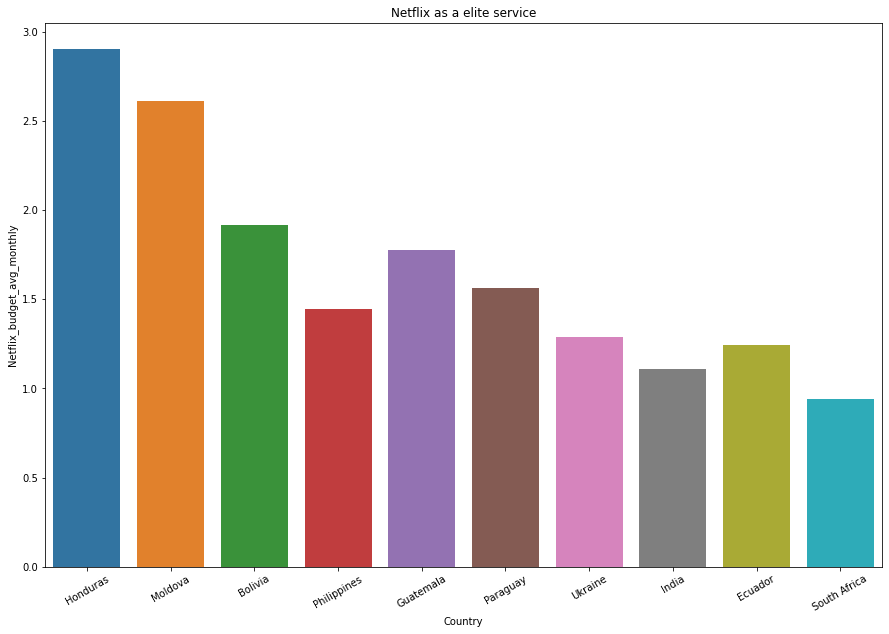

In [82]:
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Netflix_budget_avg_monthly', data=worst_socres)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Netflix as a elite service')

In [83]:
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot('Country', 'Netflix avg budget perc', data=best_scores)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Netflix as a normal service')

c:\Users\Wissel\OneDrive\Desktop\Netflix-Price-Analytics\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Netflix avg budget perc'

<Figure size 1080x720 with 0 Axes>

In [ ]:
#Comparing USA and Turkey
nfx_price_per_cou_df=nfx_price_per_cou_df.set_index('Country')


In [ ]:
nfx_price_per_cou_df

,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
Country,,,,,,,,,,,,,,,,,,
Argentina,4760,3154,1606,3.74,6.30,9.26,6.433333,0.000786,0.001324,0.001945,0.001352,18933.907,1577.825583,0.407734,0.237035,0.399284,0.586884,1940.814434
Austria,5640,3779,1861,9.03,14.67,20.32,14.673333,0.001601,0.002601,0.003603,0.002602,45436.686,3786.390500,0.387528,0.238486,0.387440,0.536659,2185.659403
Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051,9558.951871
Bulgaria,6797,4819,1978,9.03,11.29,13.54,11.286667,0.001329,0.001661,0.001992,0.001661,18563.307,1546.942250,0.729611,0.583732,0.729827,0.875275,4959.168536
Chile,4994,3156,1838,7.07,9.91,12.74,9.906667,0.001416,0.001984,0.002551,0.001984,22767.037,1897.253083,0.522158,0.372644,0.522334,0.671497,2607.659135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ireland,6486,4515,1971,9.03,14.67,20.32,14.673333,0.001392,0.002262,0.003133,0.002262,67335.293,5611.274417,0.261497,0.160926,0.261438,0.362128,1696.071747
Switzerland,5506,3654,1852,12.88,20.46,26.96,20.100000,0.002339,0.003716,0.004896,0.003651,57410.166,4784.180500,0.420135,0.269221,0.427659,0.563524,2313.261383
Australia,6114,4050,2064,7.84,12.12,16.39,12.116667,0.001282,0.001982,0.002681,0.001982,44648.710,3720.725833,0.325653,0.210712,0.325743,0.440505,1991.044310


Text(0.5, 1.0, 'USA vs Turkey')

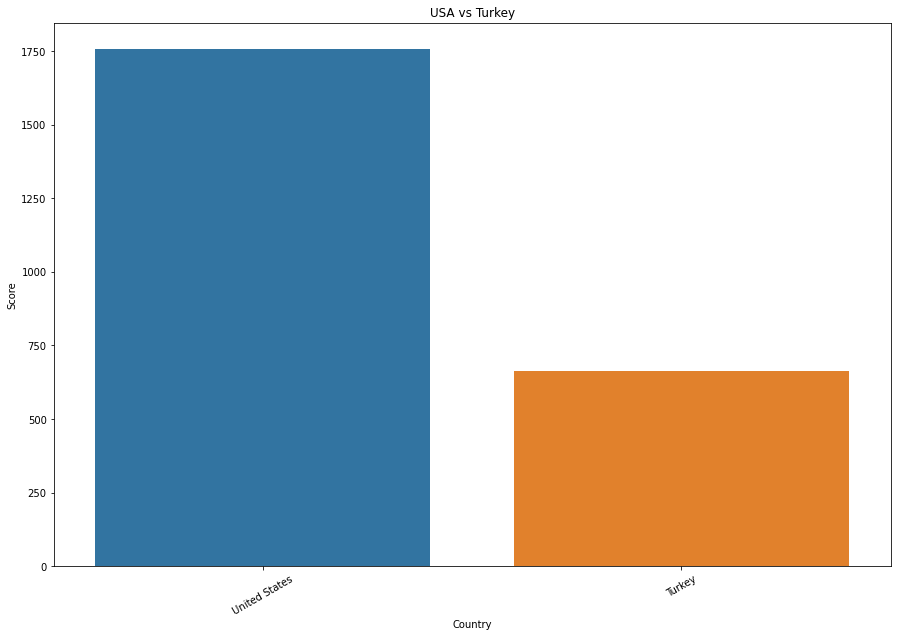

In [ ]:
usa_vs_turky=nfx_price_per_cou_df.loc[['United States','Turkey']]
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot(x=usa_vs_turky.index,y='Score', data=usa_vs_turky)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('USA vs Turkey')


Text(0.5, 1.0, 'Honduras vs Turkey')

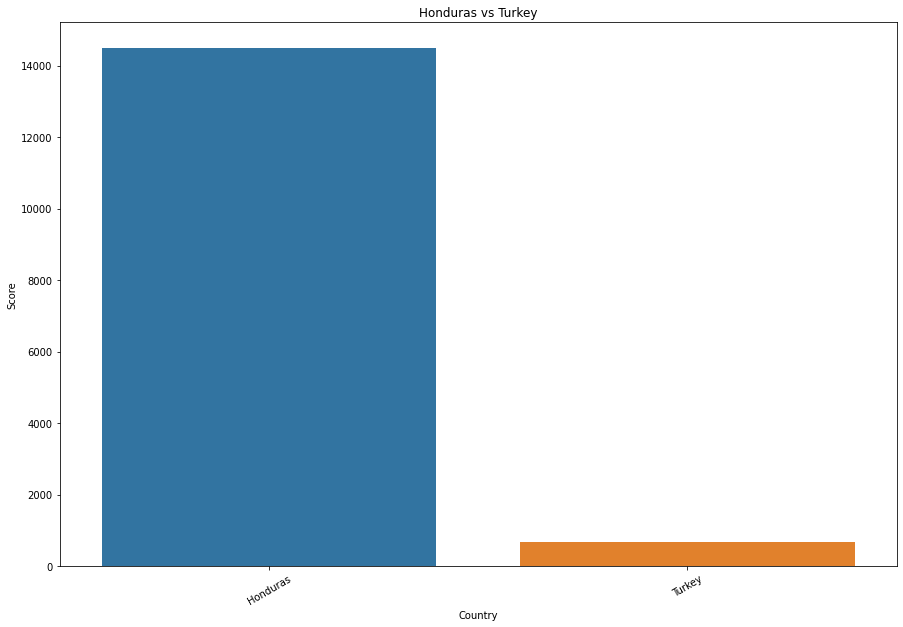

In [ ]:
hond_vs_net=nfx_price_per_cou_df.loc[['Honduras','Turkey']]
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot(x=hond_vs_net.index,y='Score', data=hond_vs_net)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Honduras vs Turkey')

Text(0.5, 1.0, 'Italy vs Turkey')

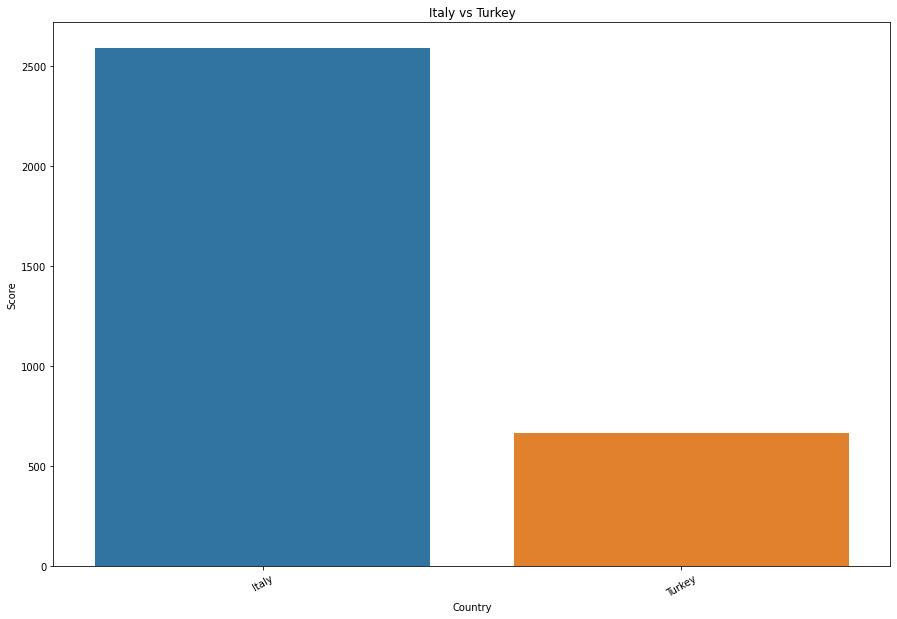

In [ ]:
turkey_vs_italy=nfx_price_per_cou_df.loc[['Italy','Turkey']]
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot(x=turkey_vs_italy.index,y='Score', data=turkey_vs_italy)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Italy vs Turkey')



Text(0.5, 1.0, 'all_comp')

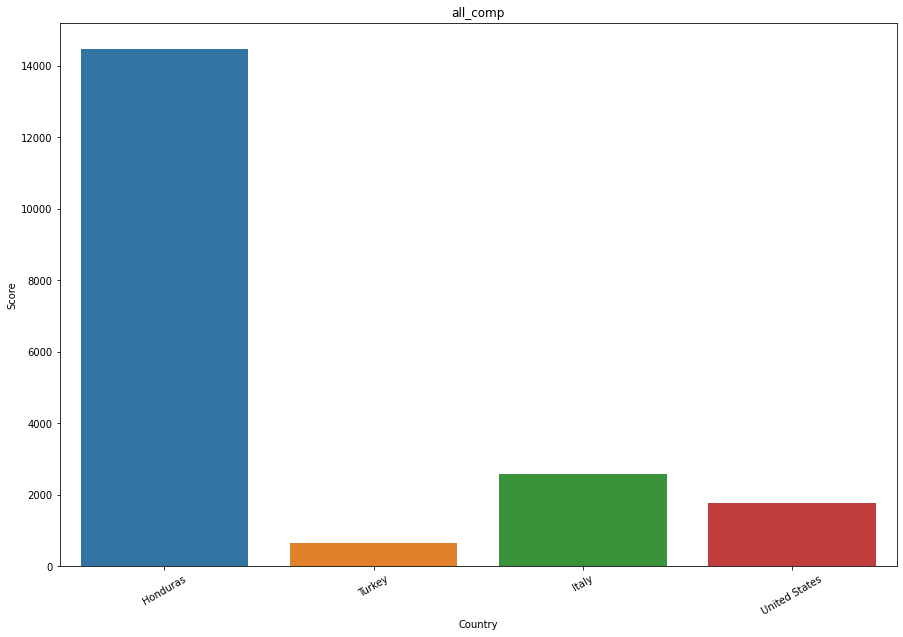

In [ ]:
all_comp=nfx_price_per_cou_df.loc[['Honduras','Turkey','Italy','United States']]
#view of the result
plt.figure(figsize=(15,10))
ax=sas.barplot(x=all_comp.index,y='Score', data=all_comp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('all_comp')


In [ ]:
#Netflix not accessable
worst_socres.head(5)

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
15,Honduras,4989,3154,1835,7.99,10.99,13.99,10.990000,0.001602,0.002203,0.002804,0.002203,4541.795,378.482917,2.903698,2.111060,2.903698,3.696336,14486.548160
25,Moldova,3937,2473,1464,9.03,11.29,13.54,11.286667,0.002294,0.002868,0.003439,0.002867,5189.972,432.497667,2.609648,2.087873,2.610419,3.130653,10274.184138
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,10.990000,0.001601,0.002202,0.002803,0.002202,6885.829,573.819083,1.915238,1.392425,1.915238,2.438051,9558.951871
30,Philippines,6362,4154,2208,7.35,9.14,10.93,9.140000,0.001155,0.001437,0.001718,0.001437,7599.188,633.265667,1.443312,1.160650,1.443312,1.725974,9182.351588
14,Guatemala,4767,3154,1613,7.99,10.99,13.99,10.990000,0.001676,0.002305,0.002935,0.002305,7423.808,618.650667,1.776447,1.291520,1.776447,2.261373,8468.321918


In [ ]:
#netflix to confy
best_scores.head(5)

,Country,Tot_shows,Tot_TVShows,Tot_Movies,Basic_monthly_cost,Std_monthly_cost,Prem_monthly_cost,Avg_cost,Avg_cost_basic_per_title,Avg_cost_Std_per_title,Avg_cost_premium_per_title,Avg_cost_per_title,gdp_per_capita,gdp_month,Netflix_budget_avg_monthly,Netflix_budget_basic_monthly,Netflix_budget_std_monthly,Netflix_budget_premium_monthly,Score
40,Turkey,4639,2930,1709,1.97,3.00,4.02,2.996667,0.000425,0.000647,0.000867,0.000646,25129.341,2094.111750,0.143100,0.094073,0.143259,0.191967,663.839294
34,San Marino,2310,1937,373,9.03,14.67,20.32,14.673333,0.003909,0.006351,0.008797,0.006352,56861.470,4738.455833,0.309665,0.190568,0.309595,0.428832,715.325861
16,Hong Kong,4746,2883,1863,8.08,10.00,11.93,10.003333,0.001702,0.002107,0.002514,0.002108,56054.920,4671.243333,0.214147,0.172973,0.214076,0.255392,1016.342259
27,Norway,4528,2955,1573,9.94,12.17,17.75,13.286667,0.002195,0.002688,0.003920,0.002934,64800.057,5400.004750,0.246049,0.184074,0.225370,0.328703,1114.110625
45,Singapore,6303,4109,2194,9.51,12.81,16.11,12.810000,0.001509,0.002032,0.002556,0.002032,85535.383,7127.948583,0.179715,0.133418,0.179715,0.226012,1132.744282
